<center>
<img src="images/ods_stickers.jpg" />
    
## Introducción al Machine Learning

Basado en material de  [Yury Kashnitsky](https://yorko.github.io). Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

# <center> Ejercicio 1. Análisis exploratorio con Pandas

<img src="images/pandas.jpg"  width=50% />


**En esta tarea se tiene que usar Pandas para responder preguntas sobre el  dataset [Adult](https://archive.ics.uci.edu/ml/datasets/Adult). **

Variables y su tipo:
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# para dibujar gráficos en jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# los gráficos en formato SVG son más nítidos y legibles
%config InlineBackend.figure_format = 'svg'
# no nos gustan los avisos
# se puden comentar las dos lineas si se quiere tener avisos
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 20, 'max_rows', 10)

In [2]:
data = pd.read_csv('./data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Veamos si las columnas son todas no nulas y tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**1. Cuantas mujeres y hombres (variable *sex* ) estan representadas en este dataset?** 

In [4]:
men_and_women = data.sex.value_counts()
print('Hay %d hombres y %d mujeres en el dataset.' % (men_and_women.Male, men_and_women.Female))

Hay 21790 hombres y 10771 mujeres en el dataset.


**2. Cual es la edad promedio (variable *age* ) de las mujeres?**

In [5]:
average_age_woman = data[data.sex == 'Female'].age.mean()
print('La edad promedio de las mujeres es %2.2f.' % average_age_woman)

La edad promedio de las mujeres es 36.86.


**3. Cual es el porcentaje de ciudadanos alemanes (variable *native-country*)?**

In [6]:
percentage = data['native-country'].value_counts(normalize=True).mul(100).round(2)
print('El porcentaje de ciudadanos alemanes es de %1.2f %%.' % percentage.Germany)

El porcentaje de ciudadanos alemanes es de 0.42 %.


**4. Cuales son la media y la desviacion estandard de la edad para aquellos que ganan mas de 50k por año (variable *salary*) ?**

In [7]:
age_by_salary = data.groupby(by='salary').age.agg([np.mean, np.std]).round(2)

# obtenemos los estadísticos de los que ganas mas de 50K
stats_more_50K = age_by_salary.loc['>50K']

print('La media es de %2.f y la desviación de %2.1f para los que ganan mas de 50K por año.' 
      % (stats_more_50K['mean'], stats_more_50K['std']))

La media es de 44 y la desviación de 10.5 para los que ganan mas de 50K por año.


**5. Cuales son la media y la desviacion estandard de la edad para aquellos que ganan menos de 50k por año (variable *salary*)?**

In [8]:
# obtenemos los estadísticos correspondientes a los que ganas mas de 50K
stats_less_50K = age_by_salary.loc['<=50K']

print('La media es de %2.f y la desviación de %2.f para los que ganan mas de 50k por año.' 
      % (stats_less_50K['mean'], stats_less_50K['std']))

La media es de 37 y la desviación de 14 para los que ganan mas de 50k por año.


**6. Es cierto que la gente que gana mas que 50K tiene al menos educacion media completa? (variable *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate*)**

In [9]:
# computamos la tabla cruzada de las variables educación y salario.
pd.crosstab(data['education'],data['salary']).T

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
salary,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387


Vemos que hay personas sin "educación media completa" (10th, 11th, 12th, 1st-4th, etc.) y que ganan mas de 50K. Podemos ser un poco más precisos con los números y agrupar en dos categorias los datos:

In [10]:
def by_medium_education(df, ind, col):
    complete_medium_education = ['Bachelors', 'Prof-school',
                                 'Assoc-acdm', 'Assoc-voc', 
                                 'Masters', 'Doctorate']
    if df[col].loc[ind] in complete_medium_education:         
        return 'with medium education'
    else:
        return 'without medium education' 

# Separamos los datos en dos grupos, lo que tienen educación completa y los que no. 
# Luego contamos los categorias de salarios en cada grupo.
gruped_data = data.groupby(lambda x: by_medium_education(data, x, 'education')).salary.value_counts()
print(gruped_data)

                          salary
with medium education     <=50K      5981
                          >50K       4535
without medium education  <=50K     18739
                          >50K       3306
Name: salary, dtype: int64


Como podemos ver hay 3306 personas sin educación completa con salario mayor a 50K; por lo **NO** es cierto que la gente que gana más que 50K tiene al menos educación media completa.

**7. Muestre los estadisticos para cada raza (*race* feature) y cada género (*sex* feature). Use *groupby()* y *describe()*. Encuentre la edad maxima de los hombres de la raza *Amer-Indian-Eskimo* .**

Primero mostramos los estadísticos de las variables continuas:

In [11]:
data.groupby(['race', 'sex']).describe().round(2)

age                                         \
                             count   mean    std   min   25%   50%    75%   
race               sex                                                      
Amer-Indian-Eskimo Female    119.0  37.12  13.11  17.0  27.0  36.0  46.00   
                   Male      192.0  37.21  12.05  17.0  28.0  35.0  45.00   
Asian-Pac-Islander Female    346.0  35.09  12.30  17.0  25.0  33.0  43.75   
                   Male      693.0  39.07  12.88  18.0  29.0  37.0  46.00   
Black              Female   1555.0  37.85  12.64  17.0  28.0  37.0  46.00   
                   Male     1569.0  37.68  12.88  17.0  27.0  36.0  46.00   
Other              Female    109.0  31.68  11.63  17.0  23.0  29.0  39.00   
                   Male      162.0  34.65  11.36  17.0  26.0  32.0  42.00   
White              Female   8642.0  36.81  14.33  17.0  25.0  35.0  46.00   
                   Male    19174.0  39.65  13.44  17.0  29.0  38.0  49.00   

                                  fnlwgt             ... capital-loss          \
                            max    count       mean  ...          75%     max   
race               sex                               ...                        
Amer-Indian-Eskimo Female  80.0    119.0  112950.73  ...          0.0  1721.0   
                   Male    82.0    192.0  125715.36  ...          0.0  1980.0   
Asian-Pac-Islander Female  75.0    346.0  147452.08  ...          0.0  2258.0   
                   Male    90.0    693.0  166175.87  ...          0.0  2457.0   
Black              Female  90.0   1555.0  212971.39  ...          0.0  4356.0   
                   Male    90.0   1569.0  242920.64  ...          0.0  2824.0   
Other              Female  74.0    109.0  172519.64  ...          0.0  1740.0   
                   Male    77.0    162.0  213679.10  ...          0.0  2179.0   
White              Female  90.0   8642.0  183549.97  ...          0.0  4356.0   
                   Male    90.0  19174.0  188987.39  ...          0.0  3770.0   

                          hours-per-week                                       \
                                   count   mean    std  min   25%   50%   75%   
race               sex                                                          
Amer-Indian-Eskimo Female          119.0  36.58  11.05  4.0  35.0  40.0  40.0   
                   Male            192.0  42.20  11.60  3.0  40.0  40.0  45.0   
Asian-Pac-Islander Female          346.0  37.44  12.48  1.0  35.0  40.0  40.0   
                   Male            693.0  41.47  12.39  1.0  40.0  40.0  45.0   
Black              Female         1555.0  36.83   9.42  2.0  35.0  40.0  40.0   
                   Male           1569.0  40.00  10.91  1.0  40.0  40.0  40.0   
Other              Female          109.0  35.93  10.30  6.0  30.0  40.0  40.0   
                   Male            162.0  41.85  11.08  5.0  40.0  40.0  40.0   
White              Female         8642.0  36.30  12.19  1.0  30.0  40.0  40.0   
                   Male          19174.0  42.67  12.19  1.0  40.0  40.0  50.0   

                                 
                            max  
race               sex           
Amer-Indian-Eskimo Female  84.0  
                   Male    84.0  
Asian-Pac-Islander Female  99.0  
                   Male    99.0  
Black              Female  99.0  
                   Male    99.0  
Other              Female  65.0  
                   Male    98.0  
White              Female  99.0  
                   Male    99.0  

[10 rows x 48 columns]

Para la raza 'Amer-Indian-Eskimo' y para hombres podemos ver qe la edad máxima en el dataset es de **82.0**.

Luego mostramos los estadísticos para las variables categoricas:

In [12]:
data.groupby(['race', 'sex']).describe(include=['object'])

workclass                        education         \
                              count unique      top   freq     count unique   
race               sex                                                        
Amer-Indian-Eskimo Female       119      7  Private     68       119     13   
                   Male         192      7  Private    122       192     15   
Asian-Pac-Islander Female       346      7  Private    243       346     15   
                   Male         693      8  Private    470       693     16   
Black              Female      1555      8  Private   1074      1555     16   
                   Male        1569      9  Private   1102      1569     16   
Other              Female       109      5  Private     86       109     13   
                   Male         162      7  Private    127       162     16   
White              Female      8642      9  Private   6281      8642     16   
                   Male       19174      9  Private  13123     19174     16   

                                              marital-status         ...  \
                                    top  freq          count unique  ...   
race               sex                                               ...   
Amer-Indian-Eskimo Female  Some-college    37            119      6  ...   
                   Male         HS-grad    83            192      6  ...   
Asian-Pac-Islander Female     Bachelors    99            346      6  ...   
                   Male       Bachelors   190            693      6  ...   
Black              Female       HS-grad   569           1555      7  ...   
                   Male         HS-grad   605           1569      6  ...   
Other              Female       HS-grad    27            109      6  ...   
                   Male         HS-grad    51            162      6  ...   
White              Female       HS-grad  2676           8642      7  ...   
                   Male         HS-grad  6228          19174      7  ...   

                            relationship        native-country         \
                                     top   freq          count unique   
race               sex                                                  
Amer-Indian-Eskimo Female      Unmarried     40            119      4   
                   Male          Husband     92            192      6   
Asian-Pac-Islander Female  Not-in-family     93            346     20   
                   Male          Husband    410            693     20   
Black              Female      Unmarried    674           1555     16   
                   Male          Husband    671           1569     16   
Other              Female  Not-in-family     32            109     16   
                   Male          Husband     80            162     16   
White              Female  Not-in-family   3324           8642     35   
                   Male          Husband  11939          19174     37   

                                                salary                       
                                     top   freq  count unique    top   freq  
race               sex                                                       
Amer-Indian-Eskimo Female  United-States    114    119      2  <=50K    107  
                   Male    United-States    182    192      2  <=50K    168  
Asian-Pac-Islander Female  United-States    115    346      2  <=50K    303  
                   Male    United-States    177    693      2  <=50K    460  
Black              Female  United-States   1429   1555      2  <=50K   1465  
                   Male    United-States   1403   1569      2  <=50K   1272  
Other              Female  United-States     56    109      2  <=50K    103  
                   Male    United-States     73    162      2  <=50K    143  
White              Female  United-States   7968   8642      2  <=50K   7614  
                   Male    United-States  17653  19174      2  <=50K  13085  

[10 rows x 28 columns]

**8. De las siguientes categorías, cual es la que tiene la mayor proporcion de ricos (>50K): married or single men (variable *marital-status*)? Considere como casados  aquellos que tienen *marital-status* comenzando por *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), el resto son bachelors.**

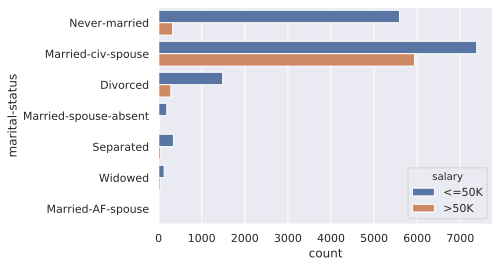

In [13]:
# Obtenemos los datos de todos los hombres
data_men = data[data.sex == 'Male']

sns.countplot(y='marital-status', hue='salary', data=data_men);

Viendo el grafico podemos ver que la categoria 'Married-civ-spouse' tiene la mayor cantidad de hombres con ingresos mayores a 50K, por sobre las otras categorias. Para ser más exactos calculemos los valores agrupando todo en dos las dos categorias.

In [14]:
def by_marital_status(df, ind, col):
    complete_medium_education = ['Married-civ-spouse',
                                 'Married-spouse-absent',
                                 'Married-AF-spouse']
    if df[col].loc[ind] in complete_medium_education:         
        return 'married'
    else:
        return 'single' 

# Separamos los datos en dos grupos, married y bachelors. 
# Luego contamos los categorias de salarios en cada grupo.
by_function = lambda x: by_marital_status(data, x, 'marital-status')
gruped_data = data.groupby(by_function).salary.value_counts(normalize=True).mul(100).round(2)
print(gruped_data)

         salary
married  <=50K     56.31
         >50K      43.69
single   <=50K     93.55
         >50K       6.45
Name: salary, dtype: float64


Vemos que entre los casados tenemos un **43.69 %**  de ricos mientras que entre los solteros la cifra es de **6.45 %**.

**9. Cual es el máximo de horas que una persona trabaja por semana? (variable *hours-per-week*)? Cuantas personas trabajan ese numero de horas y cual es el porcentaje entre esas personas que ademas ganan mucho (>50K) ?**

Primero obtenemos el máximo de horas semanales que una persona trabaja:

In [15]:
max_hours_per_week = data['hours-per-week'].max()
print('El máximo de horas semanales es de %d hs.' % max_hours_per_week)

El máximo de horas semanales es de 99 hs.


In [16]:
# obtenemos los datos de las personas que trabajan el máximo de horas.
data_max_hours = data[data['hours-per-week'] == max_hours_per_week]
num_people = data_max_hours.shape[0]
print('El número de personas que trabaja 99 hs semanales es %d.' % num_people)

El número de personas que trabaja 99 hs semanales es 85.


In [17]:
percentage = data_max_hours.salary.value_counts(normalize=True).mul(100).round(0)
print('%d %% de personas que trabaja 99 hs semanas y son ricas (>50K).' % percentage['>50K'])

29 % de personas que trabaja 99 hs semanas y son ricas (>50K).


**10. Cuente el numero de horas de trabajo (hours-per-week) PROMEDIO de aquellos que ganan poco, y de los que ganan mucho (salary) para cada pais (native-country). Cuales son esos conteos PROMEDIO para Japon? (REDONDEADO)**

In [18]:
mean_groups = data.groupby(by=['native-country', 'salary'])['hours-per-week'].mean().round(0)
japan_hours = mean_groups['Japan']
print('En Japon las horas de trabajo son:')
print('* %d para los ganan menos de 50K' % japan_hours['<=50K'])
print('* %d para los ganan más de 50K' % japan_hours['>50K'])

En Japon las horas de trabajo son:
* 41 para los ganan menos de 50K
* 48 para los ganan más de 50K
